In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv("../Oblig2/tripadvisor_review.csv")

In [4]:
data.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [5]:
df = data.drop(["User ID"], axis=1)
df.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [6]:
matrix = df.corr()

In [7]:
print(matrix)

             Category 1  Category 2  Category 3  Category 4  Category 5  \
Category 1     1.000000   -0.187692    0.008613    0.073456   -0.100483   
Category 2    -0.187692    1.000000    0.043586    0.131624    0.119631   
Category 3     0.008613    0.043586    1.000000    0.061128    0.281668   
Category 4     0.073456    0.131624    0.061128    1.000000    0.101878   
Category 5    -0.100483    0.119631    0.281668    0.101878    1.000000   
Category 6     0.094142    0.148404    0.356435    0.215866    0.581306   
Category 7    -0.012474    0.110052    0.750651    0.228348    0.232318   
Category 8     0.020029   -0.158642   -0.172953   -0.103583   -0.020957   
Category 9    -0.047313    0.073342   -0.085435    0.026670    0.041693   
Category 10    0.050700   -0.065762   -0.440543   -0.352909   -0.247470   

             Category 6  Category 7  Category 8  Category 9  Category 10  
Category 1     0.094142   -0.012474    0.020029   -0.047313     0.050700  
Category 2     0.148404 

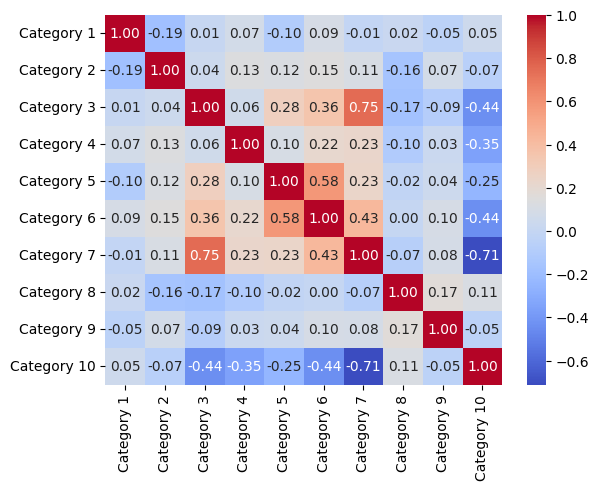

In [8]:
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [9]:
def optimise_k_menas(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)
    
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, "o-")
    plt.xlabel('Number og Cluser')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

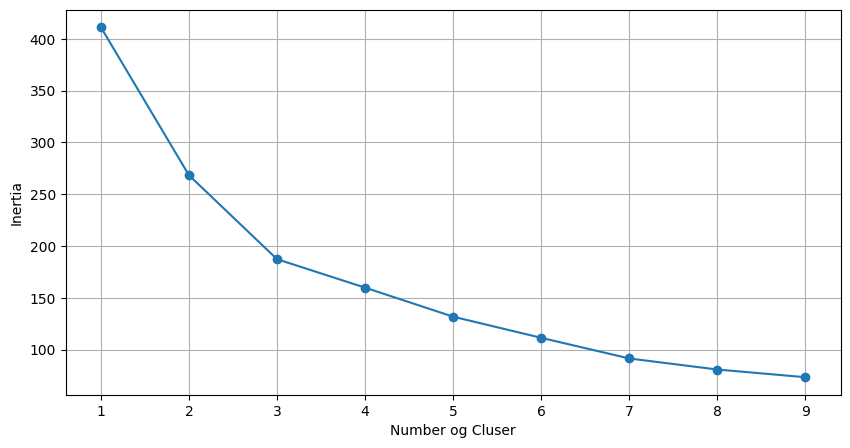

In [10]:
optimise_k_menas(df[["Category 2", "Category 5"]], 10)

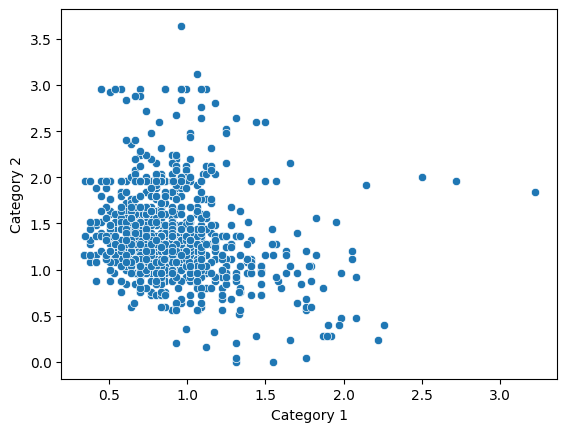

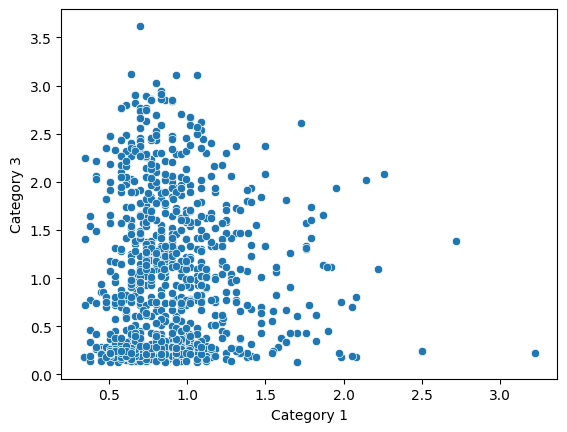

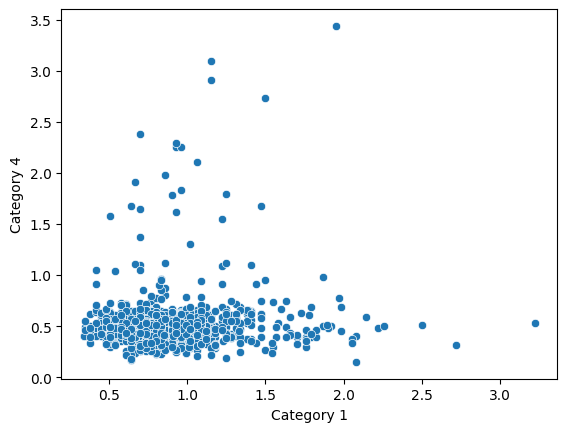

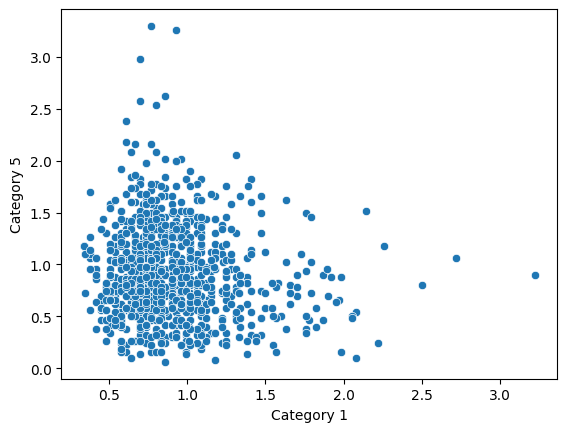

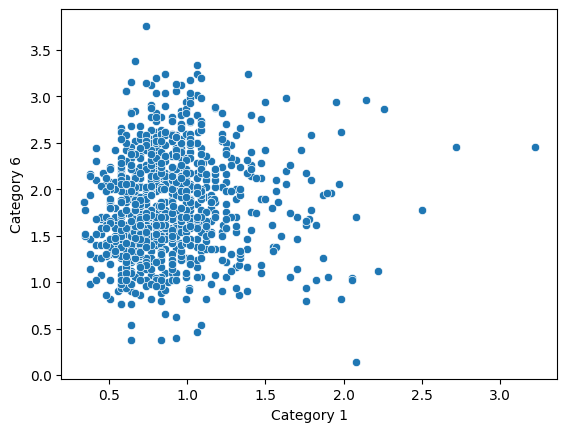

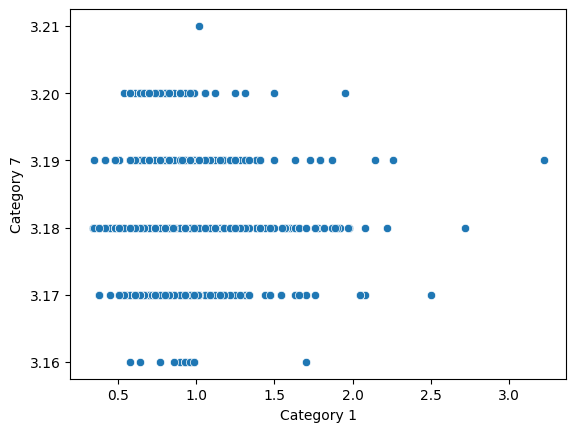

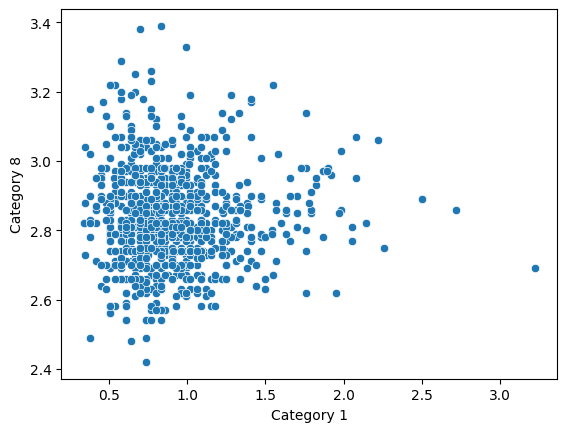

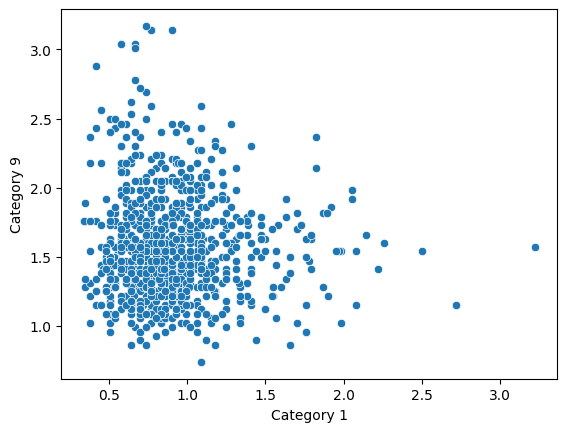

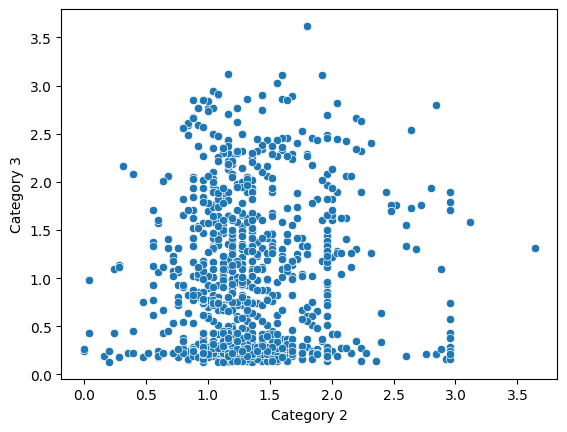

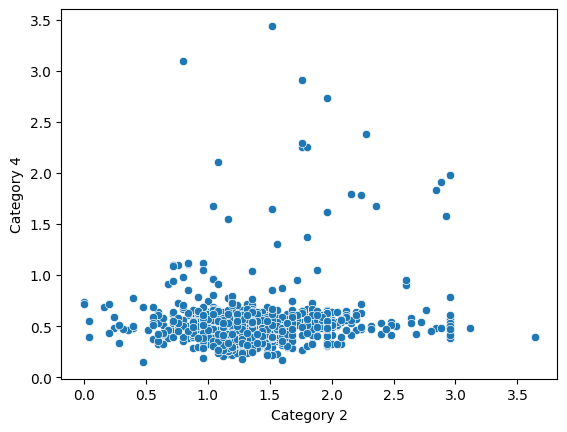

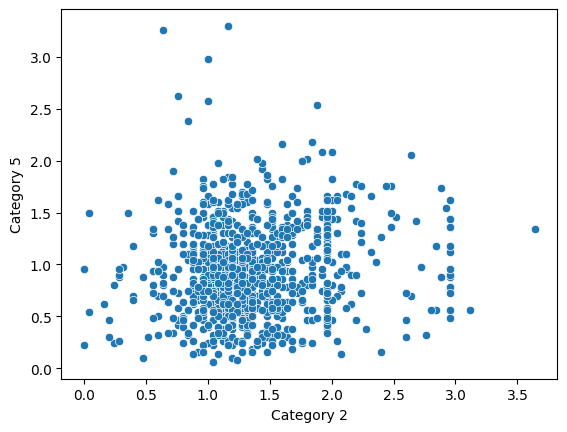

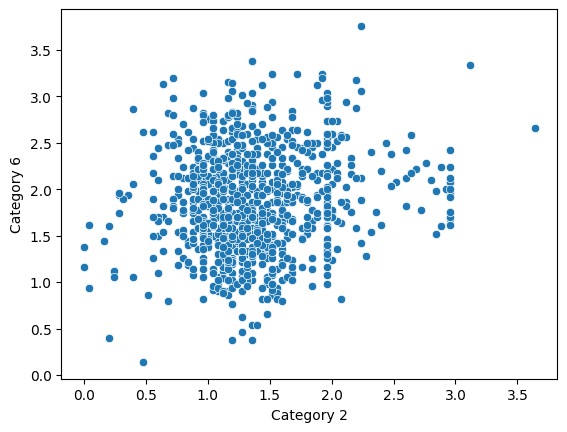

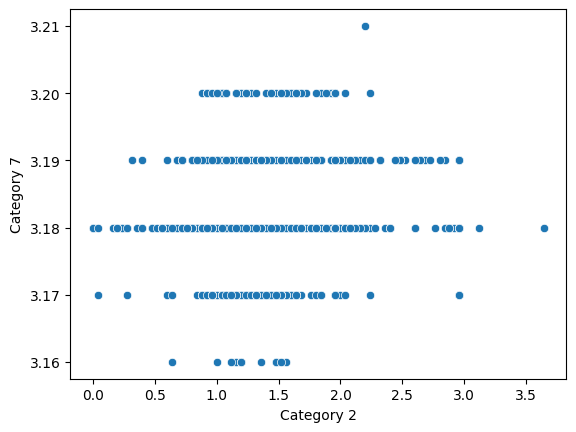

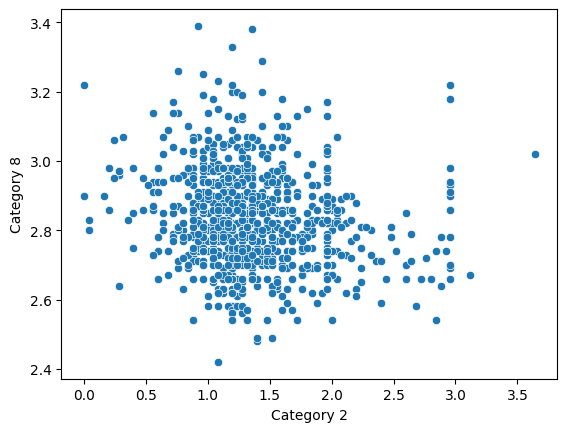

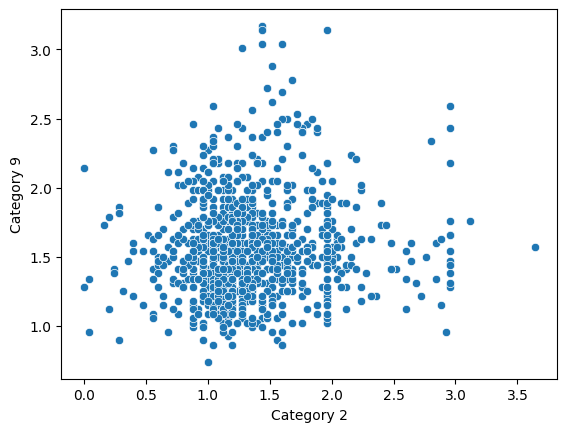

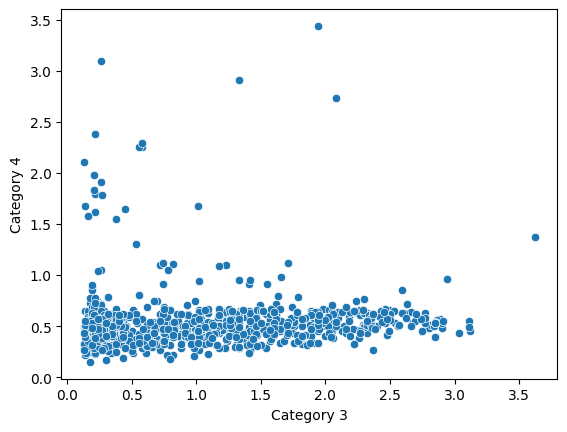

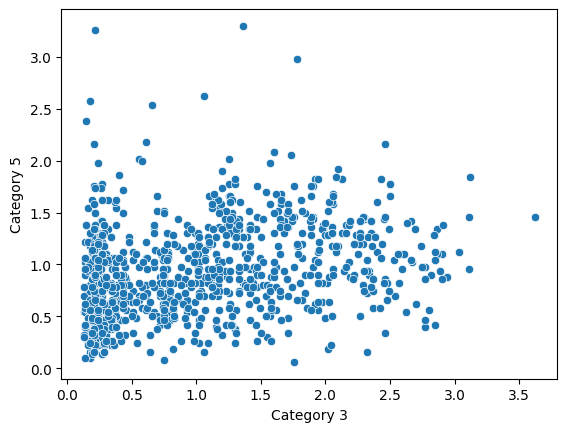

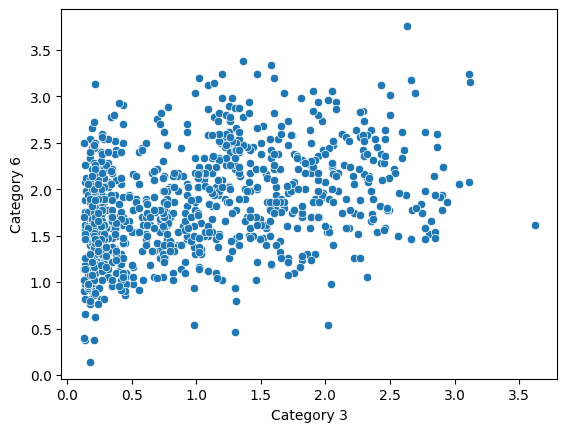

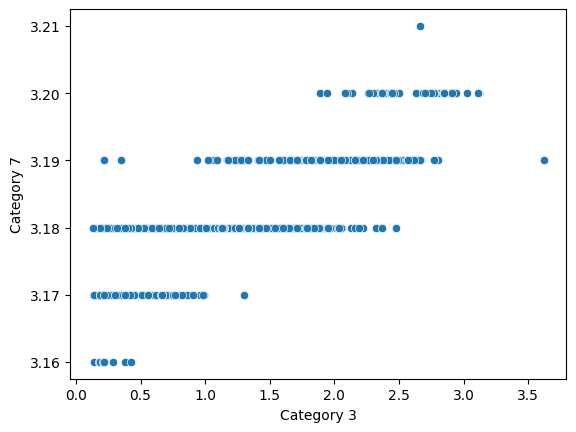

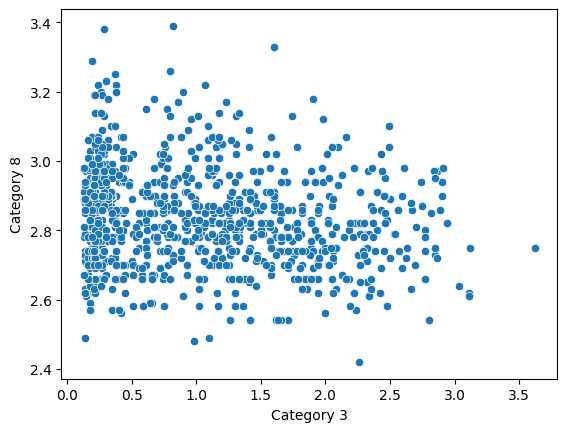

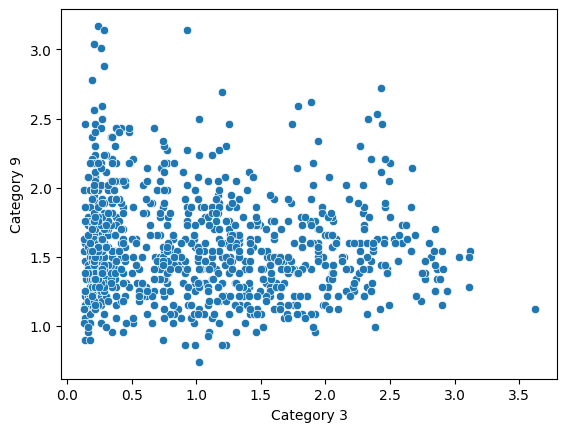

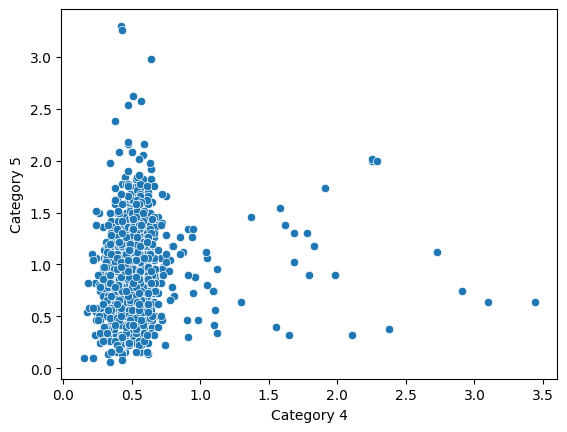

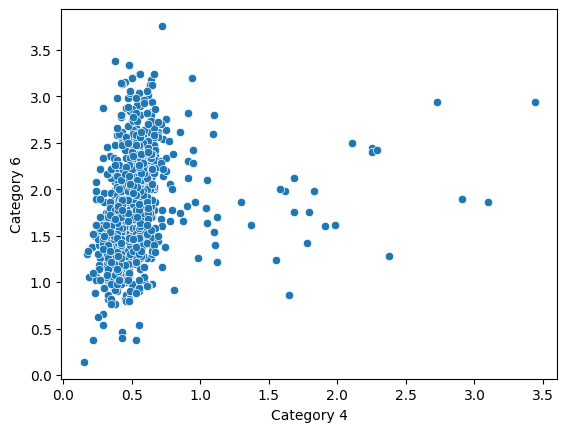

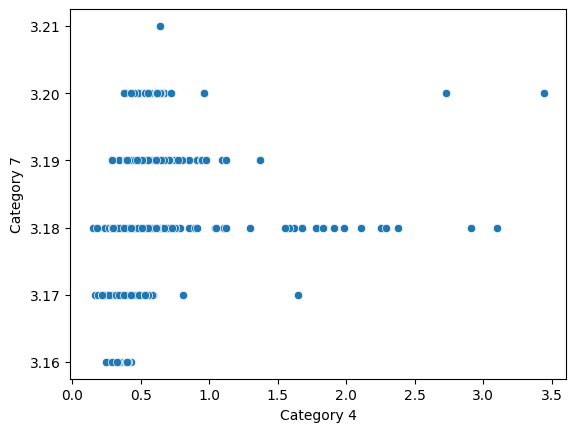

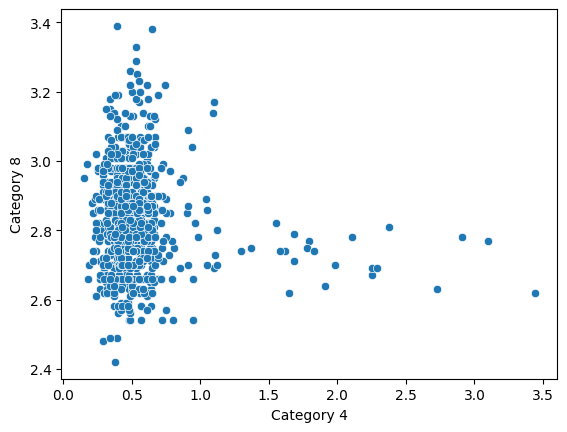

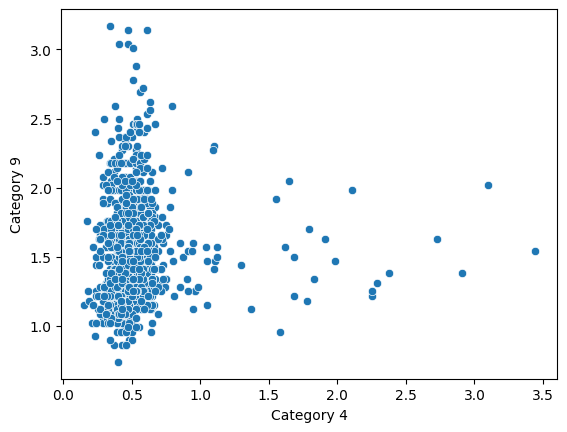

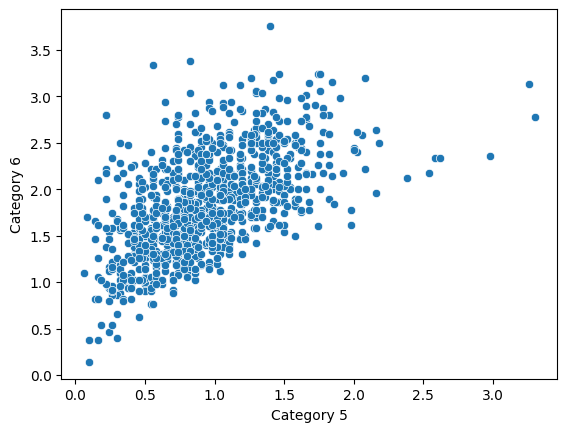

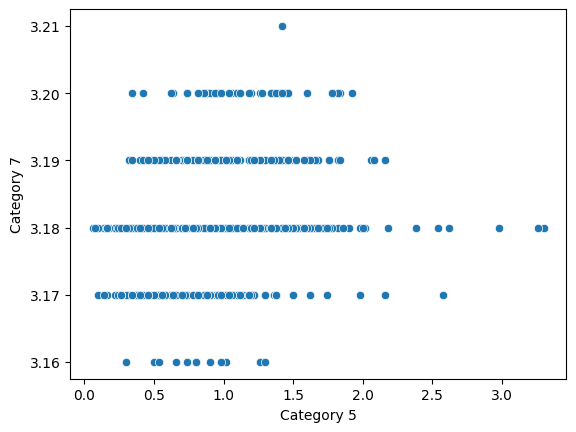

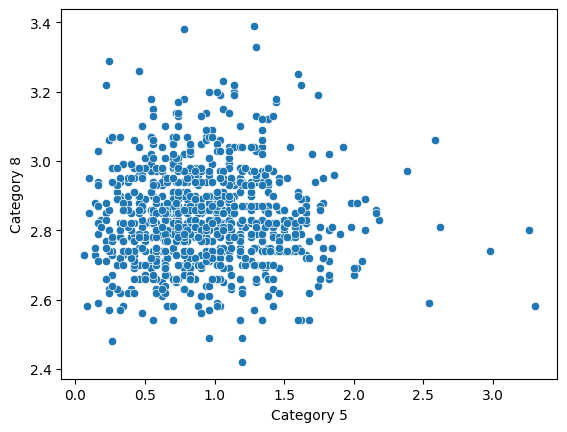

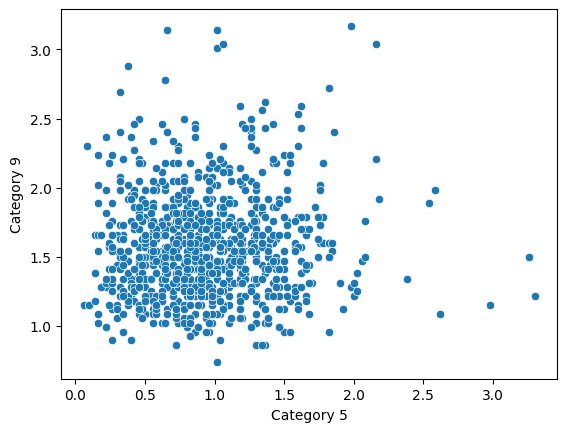

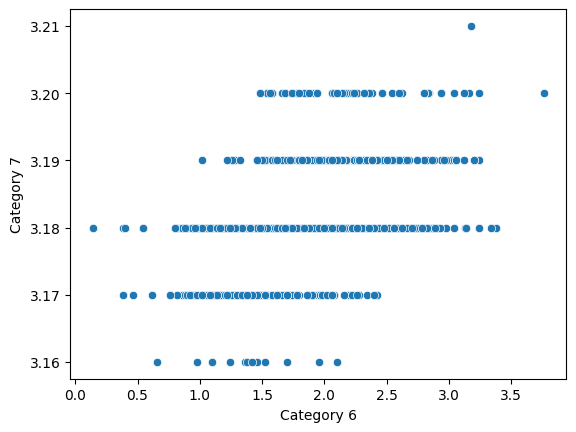

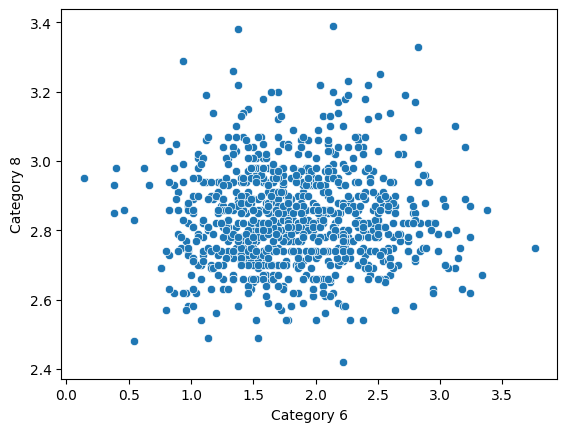

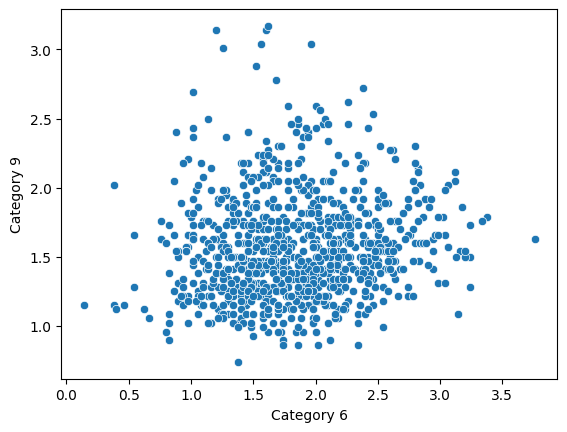

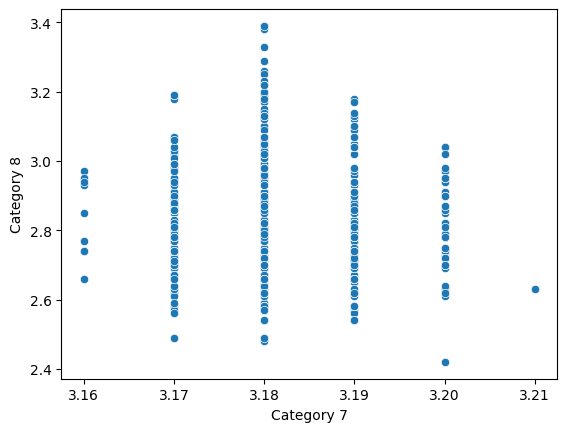

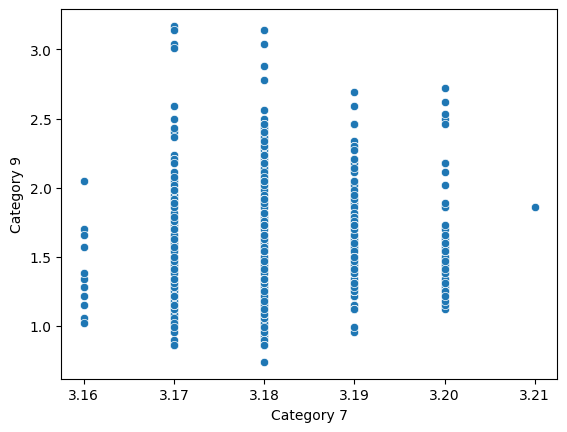

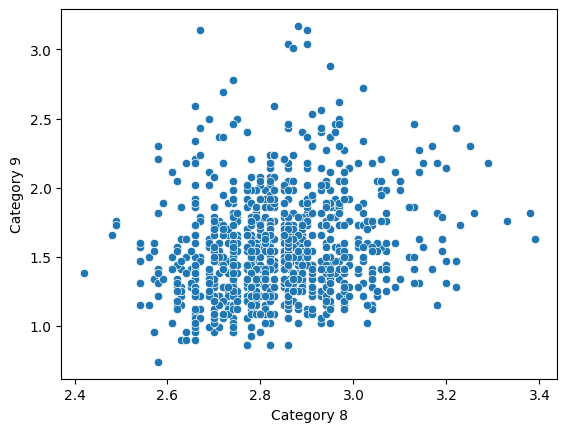

In [11]:
for i in range(len(df.columns)-1):
    for j in range(i+1, len(df.columns)-1):
        x_label = df.columns[i]
        y_label = df.columns[j]
        sns.scatterplot(x=x_label, y=y_label, data=df)
        plt.show()


In [12]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [13]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_

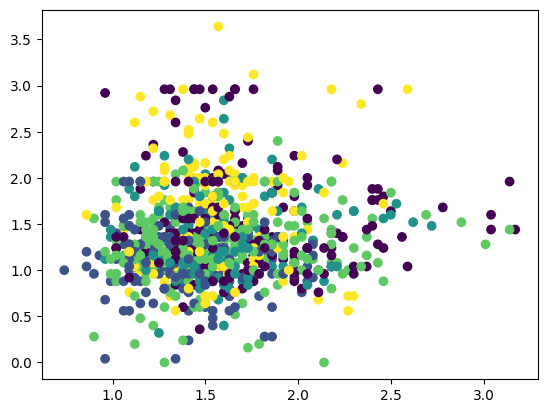

In [14]:

plt.scatter(df["Category 9"], df["Category 2"], c=labels, cmap='viridis', marker='o', label='Data points')